<a href="https://colab.research.google.com/github/csoren66/AI-agent-using-LangGraph/blob/main/01_langgraph_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langsmith

In [ ]:
!pip install langchain langchain_groq langchain_community

In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')
langsmith=userdata.get('LANGSMITH_API_KEY')

In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"]="LangGraph"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7f6deb88e140>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f6deb88d210>, model_name='Gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

###Buliding Chatbot using LangGraph

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):

  messages:Annotated[list, add_messages]

graph_builder= StateGraph(State)

In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot", chatbot)

In [ ]:
graph_builder

In [ ]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [ ]:
graph=graph_builder.compile()

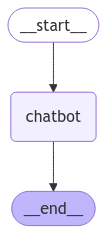

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass


In [ ]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("End")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant: ", value["messages"].content)

User: hi
dict_values([{'messages': AIMessage(content='Hi there! 👋  What can I do for you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 3.4e-07, 'queue_time': 0.00291004, 'total_time': 0.029091249}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-b6a06433-d077-4d68-a9f2-1b6cd5bbfd98-0', usage_metadata={'input_tokens': 10, 'output_tokens': 16, 'total_tokens': 26})}])
content='Hi there! 👋  What can I do for you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 3.4e-07, 'queue_time': 0.00291004, 'total_time': 0.029091249}, 'model_name': 'Gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-b6a06433-d077-4d68